<a href="https://colab.research.google.com/github/oailnivek/ML100-Days/blob/master/homework/Day_076_Optimizer_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
# 第一步： 選擇模型, 順序模型是多個網絡層的線性堆疊

# 第二步： 構建網絡層

# 第三步： 編譯

# 第四步： 資料分割

# 第五步： 訓練, 修正 model 參數

# 第六步： 輸出

In [0]:
def create_model():
    model = Sequential()

    model.add(Dense(32, activation='relu', input_shape=(784,))) # 輸入層，28*28=784 

    model.add(Dense(32, activation='relu')) # 隱藏層節點500個
    
    model.add(Dense(10, activation='softmax')) # 輸出結果是10個類別，所以維度是10
    
    return model

In [15]:
def model_summary():
    model = create_model()
    # 模型建立完成後，統計參數總量
    print("Total Parameters：%d" % model.count_params())

    # 輸出模型摘要資訊
    model.summary()

model_summary()

Total Parameters：26506
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_60 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_61 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [16]:
'''
    SGD(隨機梯度下降) - Arguments
    lr: float >= 0. Learning rate.
    momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
    decay: float >= 0. Learning rate decay over each update.
    nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
    RMSprop- Arguments
    lr: float >= 0. Learning rate.
    rho: float >= 0.
    epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
    decay: float >= 0. Learning rate decay over each update.
'''

'\n    RMSprop- Arguments\n    lr: float >= 0. Learning rate.\n    rho: float >= 0.\n    epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().\n    decay: float >= 0. Learning rate decay over each update.\n'

In [0]:
def get_data():
    # 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
    (X_train, y_train), (X_test, y_test) = mnist.load_data() 

    # 由於mist的輸入數據維度是(num, 28 , 28)， 這裡需要把後面的維度直接拼起來變成784維   
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])  
    Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
    Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)
    
    return X_train, Y_train, X_test, Y_test

In [0]:
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [0]:
class OptimizerTest:
    def __init__(self, optimizer, batch_size, epochs):
        self.model = create_model()
        self.optimizer = optimizer
        self.batch_size = batch_size
        self.epochs = epochs
        self.history = None

    def fit(self, input):
        '''
           宣告並設定
           batch_size：對總的樣本數進行分組，每組包含的樣本數量
           epochs ：訓練次數
        ''' 

        X_train, Y_train = input

        self.model.compile(
            optimizer=self.optimizer,
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        self.history = self.model.fit(
            X_train,
            Y_train,
            batch_size=self.batch_size,
            epochs=self.epochs,
            shuffle=True,
            verbose=0,
            validation_split=0.3
        )
    
    def evaluate(self, input):
        X_test, Y_test = input

        print('test set\n')
        scores = self.model.evaluate(
            X_test,
            Y_test,
            batch_size=self.batch_size,
            verbose=0
        )
        print ('The test loss is {}\n'.format(scores))
        result = self.model.predict(X_test, batch_size=200, verbose=0)

        result_max = numpy.argmax(result, axis=1)
        test_max = numpy.argmax(Y_test, axis=1)

        result_bool = numpy.equal(result_max, test_max)
        true_num = numpy.sum(result_bool)
        print ('The accuracy of the model is {}'.format(true_num / len(result_bool)))
        
    def plot(self):
        title = '(optimizer: {}\nbatch_size: {}\nepochs: {})'.format(self.optimizer, self.batch_size, self.epochs)
        fig, ax = plt.subplots(1, 2, figsize=(10, 4))

        # Plot training & validation accuracy values
        ax[0].plot(history.history['acc'])
        ax[0].plot(history.history['val_acc'])
        ax[0].set_title('Accuracy ' + title)
        ax[0].set_ylabel('Accuracy')
        ax[0].set_xlabel('Epoch')
        ax[0].legend(['Train', 'Test'], loc='upper left')

        # Plot training & validation loss values
        ax[1].plot(history.history['loss'])
        ax[1].plot(history.history['val_loss'])
        ax[1].set_title('Loss' + title)
        ax[1].set_ylabel('Loss')
        ax[1].set_xlabel('Epoch')
        ax[1].legend(['Train', 'Test'], loc='upper left')

        plt.show()

In [0]:
# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

optimizer: adam
batch_size: 100
epochs: 10
------------
test set

The test loss is [0.052297417791560295, 0.985670017004013]

The accuracy of the model is 0.9257


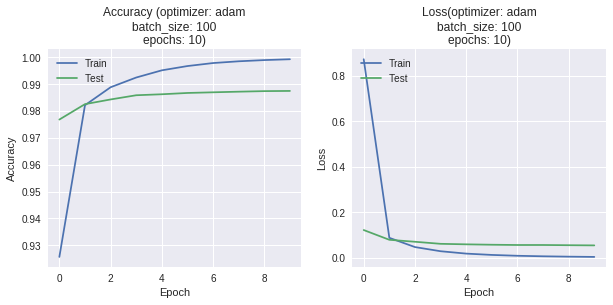

optimizer: adam
batch_size: 100
epochs: 30
------------
test set

The test loss is [0.0474384199117776, 0.9864300179481507]

The accuracy of the model is 0.9293


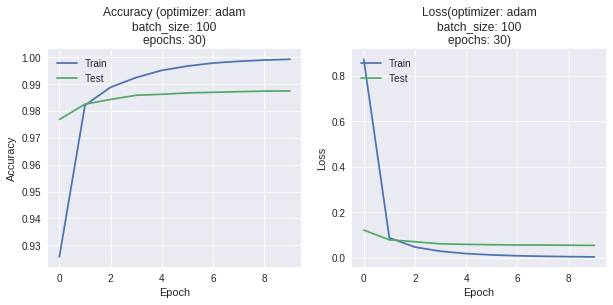

optimizer: adam
batch_size: 200
epochs: 10
------------
test set

The test loss is [0.05696459028869867, 0.9834700131416321]

The accuracy of the model is 0.9133


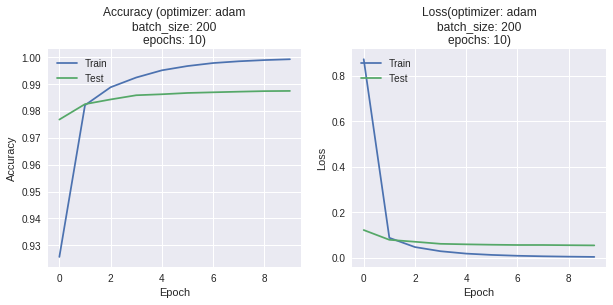

optimizer: adam
batch_size: 200
epochs: 30
------------
test set

The test loss is [0.04737816632259637, 0.9883500170707703]

The accuracy of the model is 0.9366


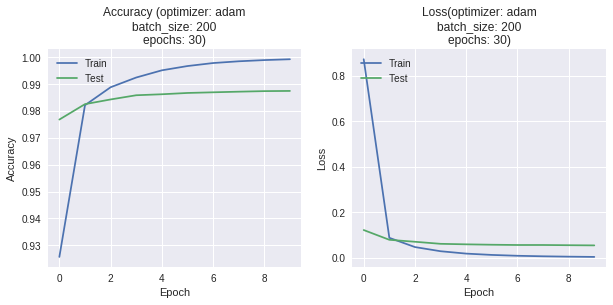

optimizer: adam
batch_size: 400
epochs: 10
------------
test set

The test loss is [0.0794658687710762, 0.9764299941062927]

The accuracy of the model is 0.8765


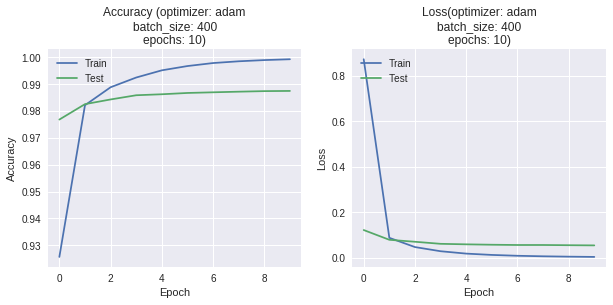

optimizer: adam
batch_size: 400
epochs: 30
------------
test set

The test loss is [0.04751617290079593, 0.9869499969482421]

The accuracy of the model is 0.9317


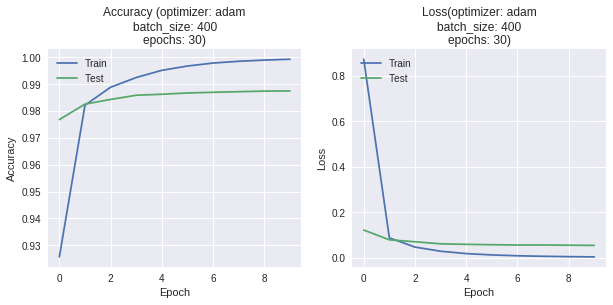

optimizer: sgd
batch_size: 100
epochs: 10
------------
test set

The test loss is [0.10252899516373873, 0.9658000111579895]

The accuracy of the model is 0.8097


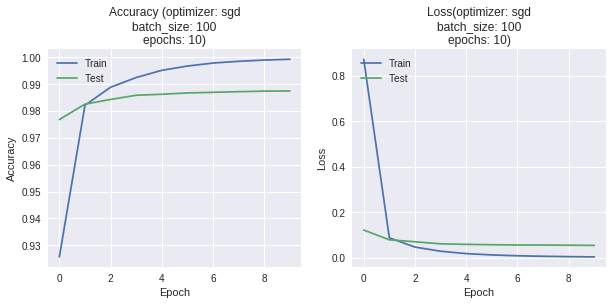

optimizer: sgd
batch_size: 100
epochs: 30
------------
test set

The test loss is [0.04648306354880333, 0.9856600153446198]

The accuracy of the model is 0.9241


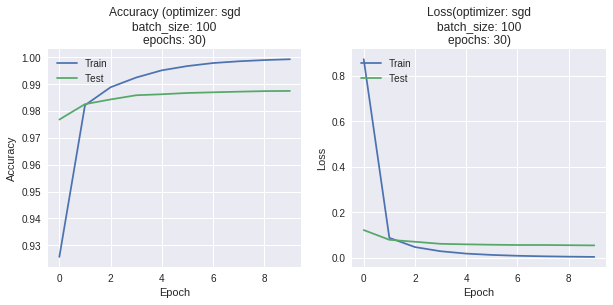

optimizer: sgd
batch_size: 200
epochs: 10
------------
test set

The test loss is [0.16605887860059737, 0.9366499924659729]

The accuracy of the model is 0.6151


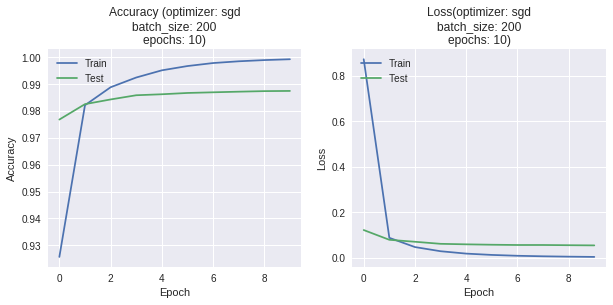

optimizer: sgd
batch_size: 200
epochs: 30
------------
test set

The test loss is [0.09293689781799913, 0.9716300082206726]

The accuracy of the model is 0.8607


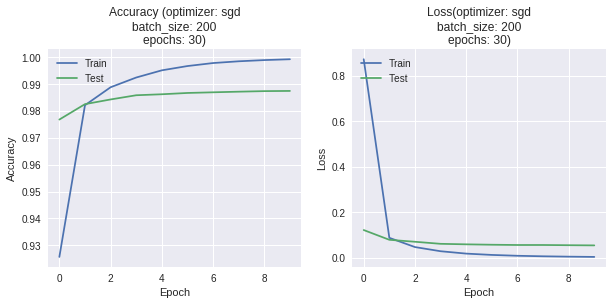

optimizer: sgd
batch_size: 400
epochs: 10
------------
test set

The test loss is [0.13824832022190095, 0.9533299994468689]

The accuracy of the model is 0.7483


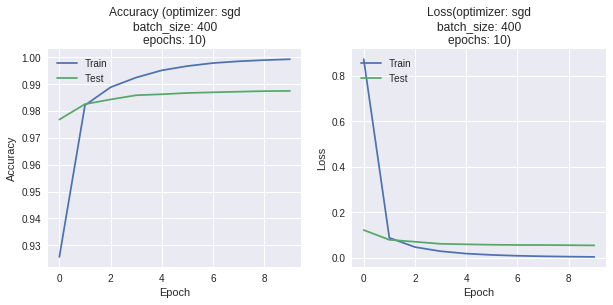

optimizer: sgd
batch_size: 400
epochs: 30
------------
test set

The test loss is [0.0662075024843216, 0.9803199934959411]

The accuracy of the model is 0.8964


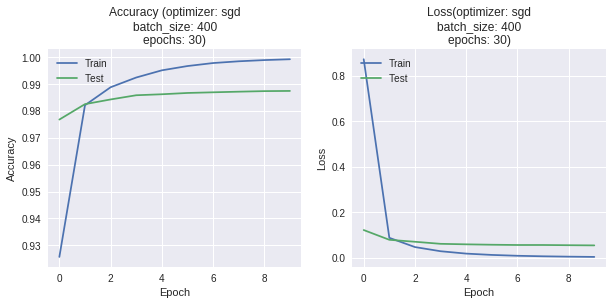

optimizer: rmsprop
batch_size: 100
epochs: 10
------------
test set

The test loss is [0.05459564112476073, 0.9859000188112259]

The accuracy of the model is 0.9236


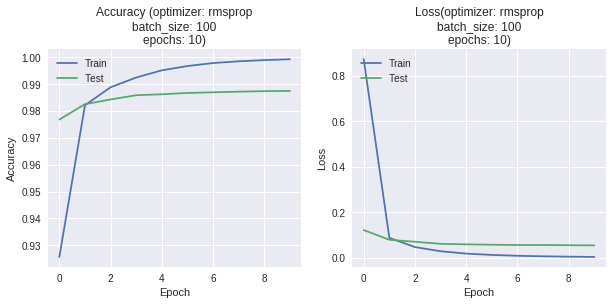

optimizer: rmsprop
batch_size: 100
epochs: 30
------------
test set

The test loss is [0.05166360367584275, 0.989940015077591]

The accuracy of the model is 0.9471


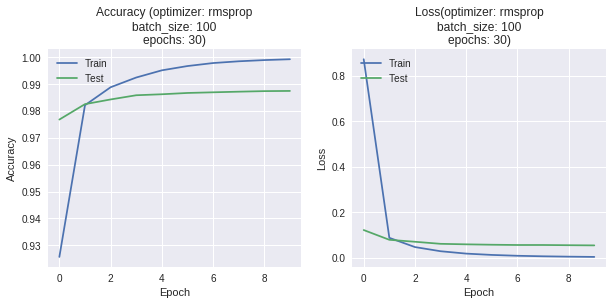

optimizer: rmsprop
batch_size: 200
epochs: 10
------------
test set

The test loss is [0.04872693251585588, 0.9870100164413452]

The accuracy of the model is 0.9299


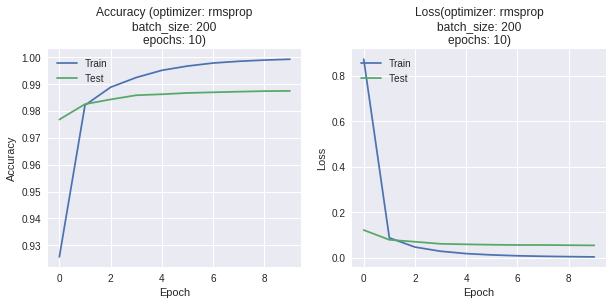

optimizer: rmsprop
batch_size: 200
epochs: 30
------------
test set

The test loss is [0.04816260477295145, 0.9906900215148926]

The accuracy of the model is 0.9522


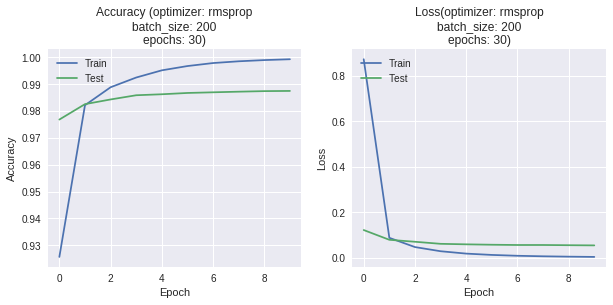

optimizer: rmsprop
batch_size: 400
epochs: 10
------------
test set

The test loss is [0.05696737594902515, 0.9845300006866455]

The accuracy of the model is 0.9178


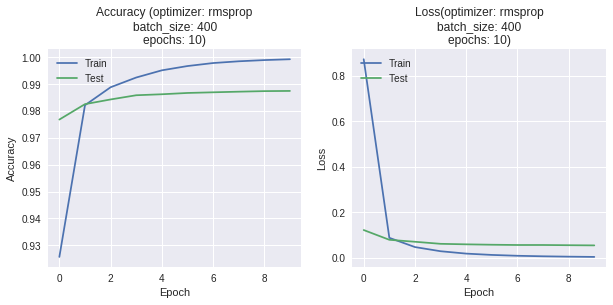

optimizer: rmsprop
batch_size: 400
epochs: 30
------------
test set

The test loss is [0.04582531224936247, 0.9904799985885621]

The accuracy of the model is 0.951


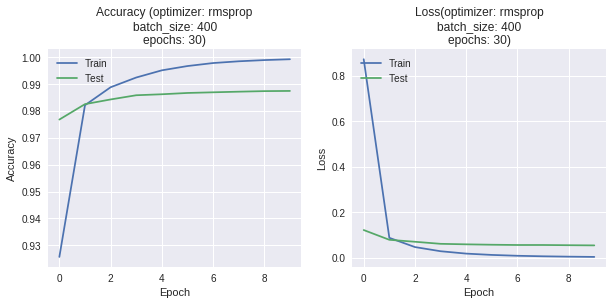

In [29]:
X_train, Y_train, X_test, Y_test = get_data()

for optimizer in ['adam', 'sgd', 'rmsprop']:
    for batch_size in [100, 200, 400]:
        for epochs in [10, 30]:
            print('==========')
            print('optimizer: {}\nbatch_size: {}\nepochs: {}'.format(optimizer, batch_size, epochs))
            print('------------')
            
            test = OptimizerTest(
                optimizer=optimizer,
                batch_size=batch_size,
                epochs=epochs
            )

            test.fit((X_train, Y_train))
            test.evaluate((X_test, Y_test))
            test.plot()